# Option Learning experiment

This notebook reproduces the Option Learning experiment from the STOMP paper.

As in the implementation from the paper, the TwoRooms environment has 72 states, the 72 non-terminal grid cells.

In [1]:
""" Imports """
import numpy as np

from gridworld.gridworld import TemporaryGridWorld as GridWorld
from gridworld.room_design import stomp_two_room_design
from stomp.framework import TemporarySTOMP as STOMP


C:\Users\luizt\projects\research\STOMP\stomp\framework.py:161: SyntaxWarning: invalid escape sequence '\w'
  tqdm.write("\w_rewards and W_transitions saved!")
C:\Users\luizt\projects\research\STOMP\stomp\framework.py:177: SyntaxWarning: invalid escape sequence '\w'
  tqdm.write("\w saved!")


In [2]:
""" Experiment Parameters """

runs = 100
number_of_steps = 50000
subgoal_state_idx = 30  # this is the hallway state in the TwoRooms
subgoal_idx = 0

env = GridWorld(room_array=stomp_two_room_design)

env.num_states


72

In [3]:
""" Run Experiment """

# Store statistics
many_initial_state_estimatives = np.zeros((runs, number_of_steps))
many_rmse_of_states = np.zeros((runs, number_of_steps))

for i in range(runs):
    print(f"Run {i + 1}/{runs}")

    env.reset()
    stomp = STOMP(
        env=env,
        subgoal_states_info={subgoal_state_idx: (7, 3)},  # hallway state position in the grid
    )

    # Local access to option learning
    option_learning = stomp.option_learning

    initial_state_estimative, rmse_of_states = option_learning.learn_options(
        subgoal_idx, number_of_steps, return_rmse=True
    )

    # Store results
    many_initial_state_estimatives[i] = initial_state_estimative
    many_rmse_of_states[i] = rmse_of_states


Run 1/100


100%|██████████| 50000/50000 [00:19<00:00, 2588.41it/s]


Run 2/100


100%|██████████| 50000/50000 [00:18<00:00, 2679.84it/s]


Run 3/100


100%|██████████| 50000/50000 [00:18<00:00, 2632.14it/s]


Run 4/100


100%|██████████| 50000/50000 [00:18<00:00, 2755.45it/s]


Run 5/100


100%|██████████| 50000/50000 [00:18<00:00, 2742.50it/s]


Run 6/100


100%|██████████| 50000/50000 [00:18<00:00, 2742.51it/s]


Run 7/100


100%|██████████| 50000/50000 [00:18<00:00, 2743.21it/s]


Run 8/100


100%|██████████| 50000/50000 [00:18<00:00, 2749.14it/s]


Run 9/100


100%|██████████| 50000/50000 [00:18<00:00, 2738.17it/s]


Run 10/100


100%|██████████| 50000/50000 [00:18<00:00, 2760.57it/s]


Run 11/100


100%|██████████| 50000/50000 [00:18<00:00, 2747.47it/s]


Run 12/100


100%|██████████| 50000/50000 [00:18<00:00, 2741.51it/s]


Run 13/100


100%|██████████| 50000/50000 [00:18<00:00, 2742.16it/s]


Run 14/100


100%|██████████| 50000/50000 [00:18<00:00, 2743.81it/s]


Run 15/100


100%|██████████| 50000/50000 [00:18<00:00, 2755.82it/s]


Run 16/100


100%|██████████| 50000/50000 [00:18<00:00, 2721.84it/s]


Run 17/100


100%|██████████| 50000/50000 [00:18<00:00, 2731.30it/s]


Run 18/100


100%|██████████| 50000/50000 [00:18<00:00, 2727.42it/s]


Run 19/100


100%|██████████| 50000/50000 [00:18<00:00, 2727.90it/s]


Run 20/100


100%|██████████| 50000/50000 [00:18<00:00, 2727.80it/s]


Run 21/100


100%|██████████| 50000/50000 [00:24<00:00, 2032.40it/s]


Run 22/100


100%|██████████| 50000/50000 [00:20<00:00, 2418.74it/s]


Run 23/100


100%|██████████| 50000/50000 [00:19<00:00, 2552.21it/s]


Run 24/100


100%|██████████| 50000/50000 [00:18<00:00, 2647.20it/s]


Run 25/100


100%|██████████| 50000/50000 [00:18<00:00, 2762.44it/s]


Run 26/100


100%|██████████| 50000/50000 [00:18<00:00, 2676.10it/s]


Run 27/100


100%|██████████| 50000/50000 [00:18<00:00, 2736.74it/s]


Run 28/100


100%|██████████| 50000/50000 [00:18<00:00, 2760.52it/s]


Run 29/100


100%|██████████| 50000/50000 [00:18<00:00, 2755.54it/s]


Run 30/100


100%|██████████| 50000/50000 [00:18<00:00, 2660.19it/s]


Run 31/100


100%|██████████| 50000/50000 [00:18<00:00, 2707.16it/s]


Run 32/100


100%|██████████| 50000/50000 [00:18<00:00, 2701.49it/s]


Run 33/100


100%|██████████| 50000/50000 [00:18<00:00, 2724.32it/s]


Run 34/100


100%|██████████| 50000/50000 [00:18<00:00, 2644.65it/s]


Run 35/100


100%|██████████| 50000/50000 [00:18<00:00, 2681.44it/s]


Run 36/100


100%|██████████| 50000/50000 [00:18<00:00, 2748.65it/s]


Run 37/100


100%|██████████| 50000/50000 [00:18<00:00, 2745.09it/s]


Run 38/100


100%|██████████| 50000/50000 [00:18<00:00, 2722.90it/s]


Run 39/100


100%|██████████| 50000/50000 [00:19<00:00, 2510.17it/s]


Run 40/100


100%|██████████| 50000/50000 [00:19<00:00, 2531.10it/s]


Run 41/100


100%|██████████| 50000/50000 [00:19<00:00, 2551.98it/s]


Run 42/100


100%|██████████| 50000/50000 [00:19<00:00, 2557.32it/s]


Run 43/100


100%|██████████| 50000/50000 [00:19<00:00, 2596.99it/s]


Run 44/100


100%|██████████| 50000/50000 [00:18<00:00, 2683.67it/s]


Run 45/100


100%|██████████| 50000/50000 [00:18<00:00, 2652.91it/s]


Run 46/100


100%|██████████| 50000/50000 [00:21<00:00, 2290.45it/s]


Run 47/100


100%|██████████| 50000/50000 [00:19<00:00, 2528.53it/s]


Run 48/100


100%|██████████| 50000/50000 [00:20<00:00, 2474.00it/s]


Run 49/100


100%|██████████| 50000/50000 [00:18<00:00, 2709.66it/s]


Run 50/100


100%|██████████| 50000/50000 [00:18<00:00, 2774.13it/s]


Run 51/100


100%|██████████| 50000/50000 [00:17<00:00, 2781.57it/s]


Run 52/100


100%|██████████| 50000/50000 [00:18<00:00, 2766.73it/s]


Run 53/100


100%|██████████| 50000/50000 [00:18<00:00, 2753.95it/s]


Run 54/100


100%|██████████| 50000/50000 [00:18<00:00, 2749.37it/s]


Run 55/100


100%|██████████| 50000/50000 [00:18<00:00, 2753.94it/s]


Run 56/100


100%|██████████| 50000/50000 [00:19<00:00, 2518.02it/s]


Run 57/100


100%|██████████| 50000/50000 [00:18<00:00, 2652.04it/s]


Run 58/100


100%|██████████| 50000/50000 [00:18<00:00, 2671.02it/s]


Run 59/100


100%|██████████| 50000/50000 [00:18<00:00, 2730.34it/s]


Run 60/100


100%|██████████| 50000/50000 [00:18<00:00, 2704.42it/s]


Run 61/100


100%|██████████| 50000/50000 [00:18<00:00, 2731.26it/s]


Run 62/100


100%|██████████| 50000/50000 [00:18<00:00, 2712.32it/s]


Run 63/100


100%|██████████| 50000/50000 [00:18<00:00, 2761.29it/s]


Run 64/100


100%|██████████| 50000/50000 [00:18<00:00, 2729.15it/s]


Run 65/100


100%|██████████| 50000/50000 [00:18<00:00, 2730.21it/s]


Run 66/100


100%|██████████| 50000/50000 [00:18<00:00, 2723.16it/s]


Run 67/100


100%|██████████| 50000/50000 [00:18<00:00, 2749.85it/s]


Run 68/100


100%|██████████| 50000/50000 [00:18<00:00, 2738.29it/s]


Run 69/100


100%|██████████| 50000/50000 [00:18<00:00, 2753.26it/s]


Run 70/100


100%|██████████| 50000/50000 [00:18<00:00, 2692.79it/s]


Run 71/100


100%|██████████| 50000/50000 [00:18<00:00, 2675.04it/s]


Run 72/100


100%|██████████| 50000/50000 [00:18<00:00, 2690.21it/s]


Run 73/100


100%|██████████| 50000/50000 [00:19<00:00, 2615.70it/s]


Run 74/100


100%|██████████| 50000/50000 [00:18<00:00, 2657.75it/s]


Run 75/100


100%|██████████| 50000/50000 [00:18<00:00, 2713.80it/s]


Run 76/100


100%|██████████| 50000/50000 [00:18<00:00, 2708.91it/s]


Run 77/100


100%|██████████| 50000/50000 [00:18<00:00, 2693.89it/s]


Run 78/100


100%|██████████| 50000/50000 [00:18<00:00, 2681.78it/s]


Run 79/100


100%|██████████| 50000/50000 [00:18<00:00, 2742.03it/s]


Run 80/100


100%|██████████| 50000/50000 [00:18<00:00, 2734.20it/s]


Run 81/100


100%|██████████| 50000/50000 [00:18<00:00, 2719.27it/s]


Run 82/100


100%|██████████| 50000/50000 [00:18<00:00, 2737.20it/s]


Run 83/100


100%|██████████| 50000/50000 [00:18<00:00, 2724.18it/s]


Run 84/100


100%|██████████| 50000/50000 [00:18<00:00, 2762.47it/s]


Run 85/100


100%|██████████| 50000/50000 [00:18<00:00, 2751.67it/s]


Run 86/100


100%|██████████| 50000/50000 [00:18<00:00, 2747.90it/s]


Run 87/100


100%|██████████| 50000/50000 [00:18<00:00, 2676.40it/s]


Run 88/100


100%|██████████| 50000/50000 [00:18<00:00, 2695.59it/s]


Run 89/100


100%|██████████| 50000/50000 [00:18<00:00, 2753.76it/s]


Run 90/100


100%|██████████| 50000/50000 [00:18<00:00, 2769.93it/s]


Run 91/100


100%|██████████| 50000/50000 [00:18<00:00, 2743.00it/s]


Run 92/100


100%|██████████| 50000/50000 [00:18<00:00, 2775.26it/s]


Run 93/100


100%|██████████| 50000/50000 [00:18<00:00, 2775.24it/s]


Run 94/100


100%|██████████| 50000/50000 [00:17<00:00, 2780.32it/s]


Run 95/100


100%|██████████| 50000/50000 [00:18<00:00, 2774.12it/s]


Run 96/100


100%|██████████| 50000/50000 [00:18<00:00, 2773.81it/s]


Run 97/100


100%|██████████| 50000/50000 [00:17<00:00, 2779.87it/s]


Run 98/100


100%|██████████| 50000/50000 [00:18<00:00, 2767.66it/s]


Run 99/100


100%|██████████| 50000/50000 [00:18<00:00, 2774.88it/s]


Run 100/100


100%|██████████| 50000/50000 [00:17<00:00, 2779.58it/s]


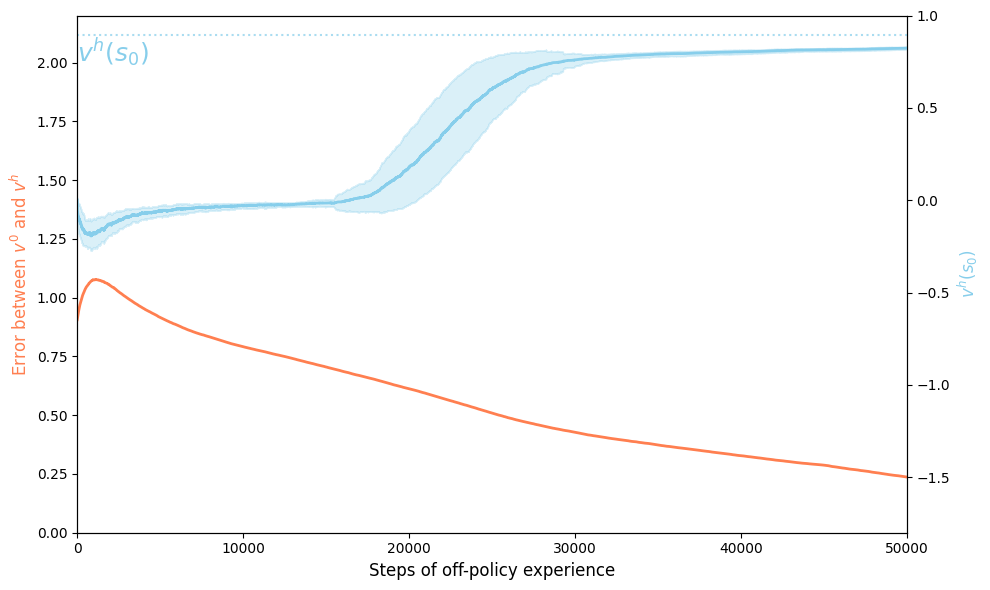

In [4]:
""" Plot the results """

import matplotlib.pyplot as plt

# Calculate the averages
average_v_s0 = np.mean(many_initial_state_estimatives, axis=0)
average_rmse = np.mean(many_rmse_of_states, axis=0)

stddev_v_s0 = np.std(many_initial_state_estimatives, axis=0)
stddev_rmse = np.std(many_rmse_of_states, axis=0)


# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary axis (left y-axis) for error (red)
ax1.set_xlabel('Steps of off-policy experience', fontsize=12, color='black')
ax1.set_ylabel('Error between $v^0$ and $v^h$', color='coral', fontsize=12)
ax1.plot(range(number_of_steps), average_rmse, color='coral', linewidth=2)
# ax1.fill_between(
#     range(number_of_steps),
#     average_rmse - stddev_rmse,
#     average_rmse + stddev_rmse,
#     color='coral',
#     alpha=0.3
# )
ax1.tick_params(axis='y', labelcolor='coral')
ax1.set_xlim(0, number_of_steps)
ax1.set_ylim(0, 2.2)
ax1.grid(False)

# Secondary axis (right y-axis) for value function (blue)
ax2 = ax1.twinx()
ax2.set_ylabel('$v^h(s_0)$', color='skyblue', fontsize=12)
ax2.plot(range(number_of_steps), average_v_s0, color='skyblue', linewidth=2)
ax2.fill_between(
    range(number_of_steps),
    average_v_s0 - stddev_v_s0,
    average_v_s0 + stddev_v_s0,
    color='skyblue',
    alpha=0.3
)
ax2.tick_params(axis='y', labelcolor='skyblue')
ax2.set_ylim(-1.8, 1)
ax2.grid(False)

# Add a horizontal dotted line for reference
ax2.axhline(y=0.895, color='skyblue', linestyle='dotted', alpha=0.7)
ax2.text(0, 0.75, "$v^h(s_0)$", color='skyblue', fontsize=18)

# Style the plot
for spine in ax1.spines.values():
    spine.set_color('black')
for spine in ax2.spines.values():
    spine.set_color('black')

ax1.tick_params(colors='black')
ax2.tick_params(colors='black')
ax1.xaxis.label.set_color('black')

plt.tight_layout()
plt.show()
